# ***Synthetic data generation using Variational Autoencoder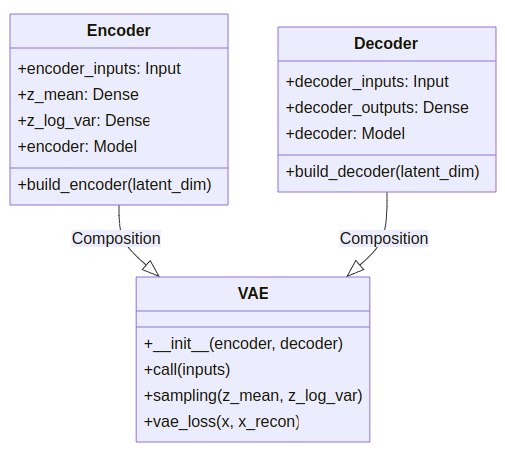***

# Team
- Ayush Agarwal | AI23MTECH11002
- Nikhil Kumar Patel | CS23MTECH11013
- S. Madarkar | AI23MTECH13003
- Arjit Gupta | CS23MTECH12001
- Rohit Sutrave | CS23MTECH14010


At the end of the code, a summary of the entire work is provided to offer a concise overview of the project.

# **Importing required modules**


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras import layers, models, backend as K
import uuid
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

# **Reading the Data**

In [4]:
# Load data
data = pd.read_csv('card_transaction.v1.csv')

In [ ]:
# Check the unique time formats to see the variations
#unique_times = data['Time'].unique()

# Print some of the unique values for inspection
#print(unique_times[:100])  #

#some info about data, how many nans, coloumn that contains max nan
data.head(5)
num_rows = data.shape[0]
print("No of rows: ",num_rows)
num_rows_with_nan = data.isna().any(axis=1).sum()
print("num_rows_with_nan: ",num_rows_with_nan)
max_nan_column = data.isna().sum().idxmax()
max_nan_count = data.isna().sum().max()
print("max_nan_column: ",max_nan_column)
rows_with_nan = data[data.isna().any(axis=1)].index
print("rows_with_nan: ",rows_with_nan)

No of rows:  11022
num_rows_with_nan:  10761
max_nan_column:  Errors?
rows_with_nan:  Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       11012, 11013, 11014, 11015, 11016, 11017, 11018, 11019, 11020, 11021],
      dtype='int64', length=10761)


# **Coloumns with nan Value**

In [5]:
#to know the coloumns with nan values
columns_with_nan = data.columns[data.isna().any()].tolist()

print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['Merchant State', 'Zip', 'MCC', 'Errors?', 'Is Fraud?']


In [6]:
data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300.0,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411.0,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411.0,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651.0,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912.0,NaN,No


# **Replacing the nan values with most frequent values.**

In [7]:
#replacing the nan's with most frequent value using idmax()

data['Amount'].fillna(data['Amount'].value_counts().idxmax(), inplace=True)
data['Merchant City'].fillna(data['Merchant City'].value_counts().idxmax(), inplace=True)


data['Use Chip'].fillna(data['Use Chip'].value_counts().idxmax(), inplace=True)

data['Merchant Name'].fillna(data['Merchant Name'].value_counts().idxmax(), inplace=True)

data['Merchant State'].fillna(data['Merchant State'].value_counts().idxmax(), inplace=True)


data['Zip'].fillna(data['Zip'].value_counts().idxmax(), inplace=True)


data['MCC'].fillna(data['MCC'].value_counts().idxmax(), inplace=True)
#data['Errors?'].fillna(data['Errors?'].value_counts().idxmax(), inplace=True)
data['Is Fraud?'].fillna(data['Is Fraud?'].value_counts().idxmax(), inplace=True)
data['Time'].fillna(data['Time'].value_counts().idxmax(), inplace=True)

In [8]:
#to know the coloumns with nan values
columns_with_nan = data.columns[data.isna().any()].tolist()

print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['Errors?']


In [9]:
#
data.head(20)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300.0,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411.0,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411.0,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651.0,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912.0,NaN,No
5,0,0,2002,9,3,13:53,$86.19,Swipe Transaction,-7146670748125200898,Monterey Park,CA,91755.0,5970.0,NaN,No
6,0,0,2002,9,4,05:51,$93.84,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411.0,NaN,No
7,0,0,2002,9,4,06:09,$123.50,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411.0,NaN,No
8,0,0,2002,9,5,06:14,$61.72,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411.0,NaN,No
9,0,0,2002,9,5,09:35,$57.10,Swipe Transaction,4055257078481058705,La Verne,CA,91750.0,7538.0,NaN,No


# **Splitting the Time in Hours and Minutes because of time format, ex: 6:15 will be changed to 6 and 15**

In [10]:
# Convert the 'Time' column to string type
data['Time'] = data['Time'].astype(str)

# Split 'Time' into two separate columns 'Hours' and 'Minutes'
time_split = data['Time'].str.split(':', expand=True)
data['Hours'] = time_split[0]
data['Minutes'] = time_split[1]

# Convert 'Hours' and 'Minutes' to numeric, coercing errors
data['Hours'] = pd.to_numeric(data['Hours'], errors='coerce')
data['Minutes'] = pd.to_numeric(data['Minutes'], errors='coerce')

# Fill NaN values with 0 if that's appropriate for your case
data['Hours'].fillna(0, inplace=True)
data['Minutes'].fillna(0, inplace=True)

# Convert 'Hours' and 'Minutes' to integers
data['Hours'] = data['Hours'].astype(float)
data['Minutes'] = data['Minutes'].astype(float)

# Calculate the total minutes
#data['TimeInMinutes'] = data['Hours'] * 60 + data['Minutes']

# Drop the intermediate 'Hours' and 'Minutes' columns
data.drop(columns=['Time'], inplace=True)
#data.drop(['Hours', 'Minutes'], axis=1, inplace=True)

# Show the DataFrame with the new 'TimeInMinutes' column
# data
#replacing timeinminutes coloumn with Time
#data.rename(columns={'TimeInMinutes': 'Time'}, inplace=True)

In [11]:
data.head()

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Hours,Minutes
0,0,0,2002,9,1,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300.0,NaN,No,6.0,21.0
1,0,0,2002,9,1,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411.0,NaN,No,6.0,42.0
2,0,0,2002,9,2,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411.0,NaN,No,6.0,22.0
3,0,0,2002,9,2,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651.0,NaN,No,17.0,45.0
4,0,0,2002,9,3,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912.0,NaN,No,6.0,23.0


from matplotlib import pyplot as plt
_df_0['Day'].plot(kind='hist', bins=20, title='Day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Merchant Name'].plot(kind='hist', bins=20, title='Merchant Name')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Zip'].plot(kind='hist', bins=20, title='Zip')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['MCC'].plot(kind='hist', bins=20, title='MCC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Amount').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Merchant City').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Day', y='Merchant Name', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Merchant Name', y='Zip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Zip', y='MCC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='MCC', y='Hours', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['User']
  ys = series['Merchant Name']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('User', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Amount')):
  _plot_series(series, series_name, i)
  fig.legend(title='Amount', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('User')
_ = plt.ylabel('Merchant Name')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['User']
  ys = series['Merchant Name']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('User', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Merchant City')):
  _plot_series(series, series_name, i)
  fig.legend(title='Merchant City', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('User')
_ = plt.ylabel('Merchant Name')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['User']
  ys = series['Zip']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('User', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Amount')):
  _plot_series(series, series_name, i)
  fig.legend(title='Amount', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('User')
_ = plt.ylabel('Zip')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['User']
  ys = series['Zip']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('User', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Merchant City')):
  _plot_series(series, series_name, i)
  fig.legend(title='Merchant City', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('User')
_ = plt.ylabel('Zip')

from matplotlib import pyplot as plt
_df_14['Day'].plot(kind='line', figsize=(8, 4), title='Day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Merchant Name'].plot(kind='line', figsize=(8, 4), title='Merchant Name')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Zip'].plot(kind='line', figsize=(8, 4), title='Zip')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['MCC'].plot(kind='line', figsize=(8, 4), title='MCC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Merchant City'].value_counts()
    for x_label, grp in _df_18.groupby('Amount')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Amount')
_ = plt.ylabel('Merchant City')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Amount'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Day', y='Amount', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Merchant City'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Day', y='Merchant City', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Amount'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Merchant Name', y='Amount', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Merchant City'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Merchant Name', y='Merchant City', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [12]:
#types of data in use chip coloumn
data['Use Chip'].unique()


array(['Swipe Transaction', 'Online Transaction', 'Chip Transaction'],
      dtype=object)

# **Some EDA to see how data is !**

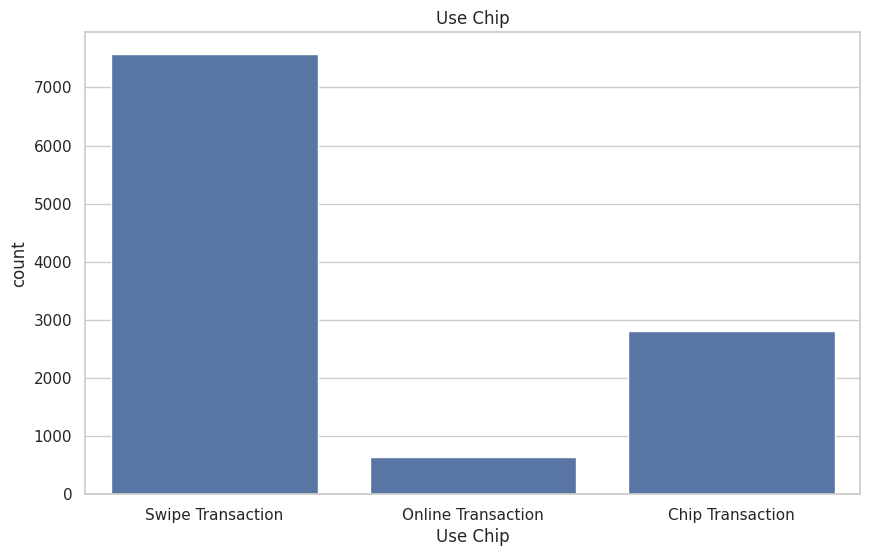

In [13]:
#plot bar graphs for Use chip

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
percent_self__copied_data=22
sns.countplot(x='Use Chip', data=data)
plt.title('Use Chip')
plt.show()


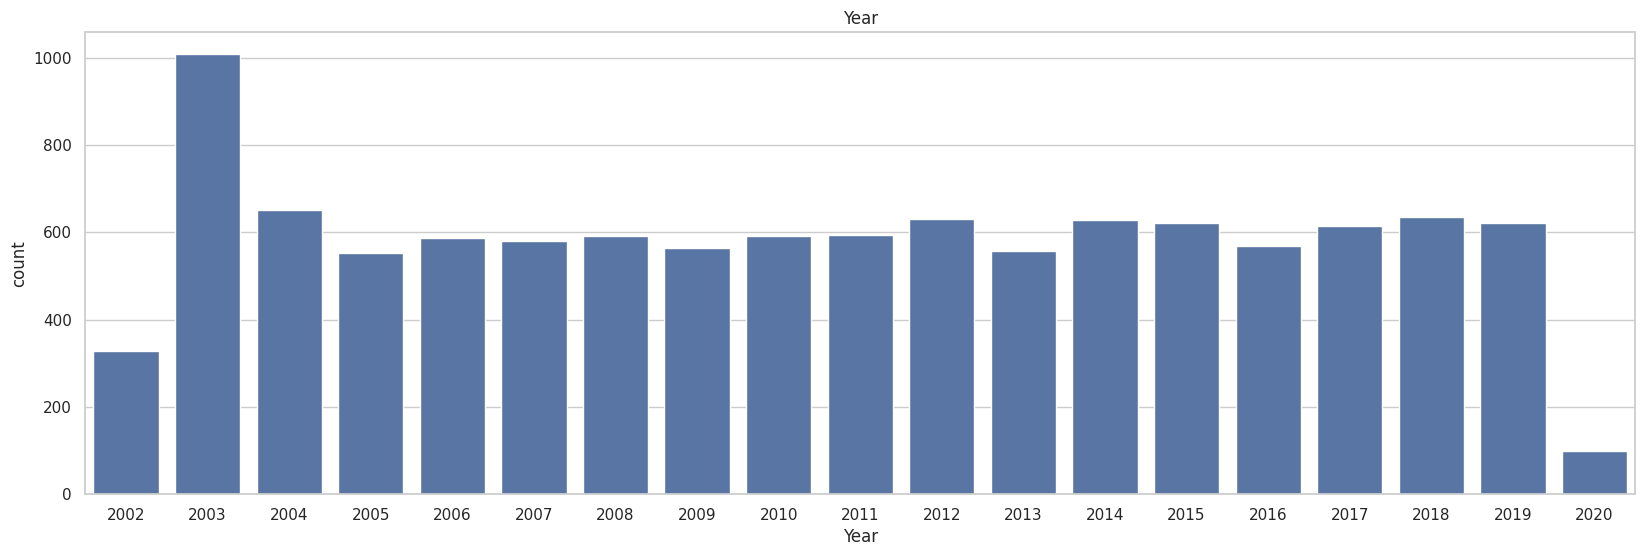

In [14]:
#plot graph for year
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.countplot(x='Year', data=data)
plt.title('Year')
plt.show()


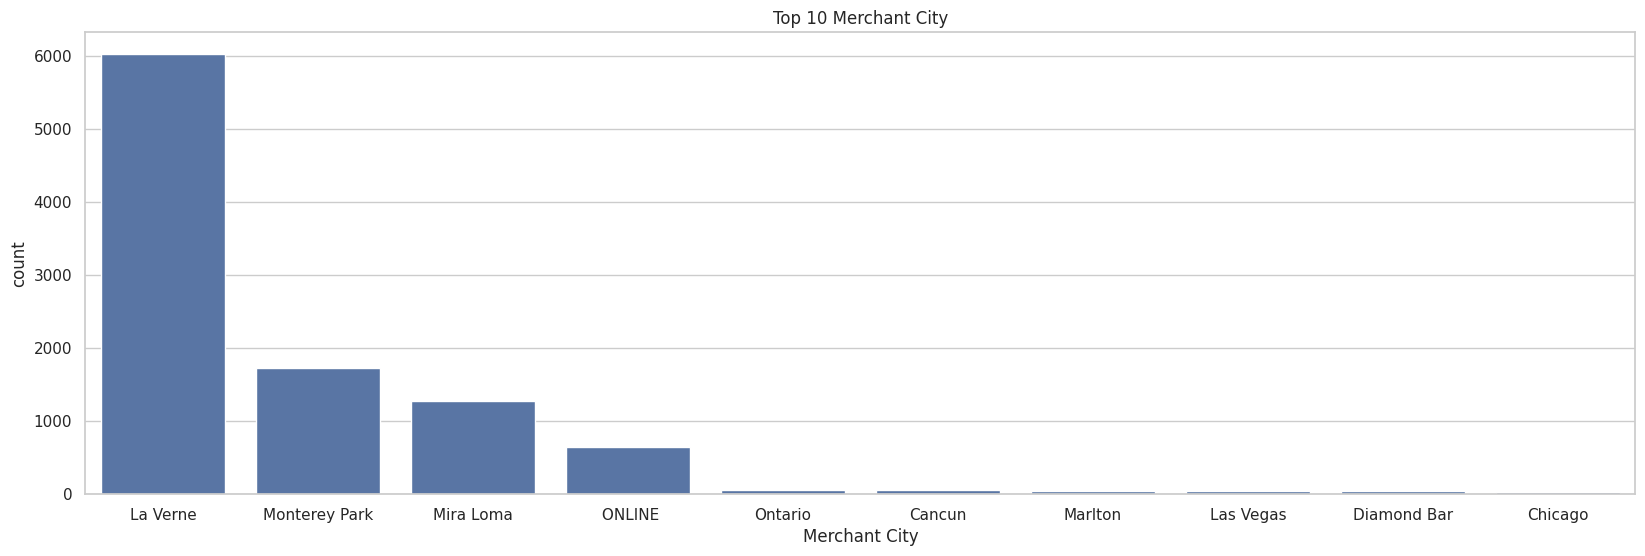

In [15]:
#plot graph for top 10 merchant city
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.countplot(x='Merchant City', data=data, order=data['Merchant City'].value_counts().iloc[:10].index)
plt.title('Top 10 Merchant City')
plt.show()

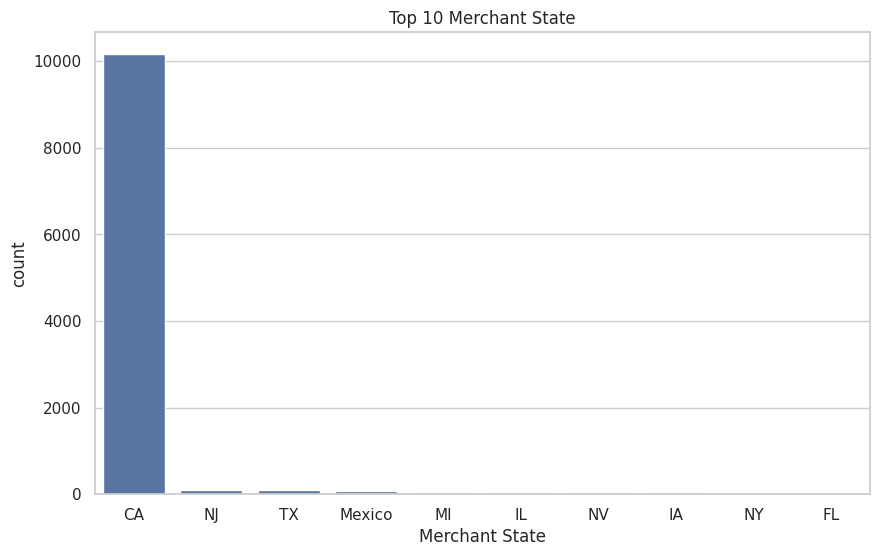

In [16]:
#plot graph for top 10 merchant state
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Merchant State', data=data, order=data['Merchant State'].value_counts().iloc[:10].index)
plt.title('Top 10 Merchant State')
plt.show()

# **Removing $ from amount**

In [17]:
data['Amount'] = data['Amount'].replace('[\$,]', '', regex=True).astype(float)

In [18]:
data.head()

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Hours,Minutes
0,0,0,2002,9,1,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300.0,NaN,No,6.0,21.0
1,0,0,2002,9,1,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411.0,NaN,No,6.0,42.0
2,0,0,2002,9,2,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411.0,NaN,No,6.0,22.0
3,0,0,2002,9,2,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651.0,NaN,No,17.0,45.0
4,0,0,2002,9,3,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912.0,NaN,No,6.0,23.0


# **Using label Encoder for text data. Changing text data into numbers**

In [19]:
encoder_dict = {}
categorical_columns = ['Use Chip', 'Merchant City', 'Merchant State', 'Errors?','Is Fraud?']
for column in categorical_columns:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column].astype(str))
    encoder_dict[column] = label_encoder

In [20]:
data.head()

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Hours,Minutes
0,0,0,2002,9,1,134.09,2,3527213246127876953,90,3,91750.0,5300.0,7,0,6.0,21.0
1,0,0,2002,9,1,38.48,2,-727612092139916043,116,3,91754.0,5411.0,7,0,6.0,42.0
2,0,0,2002,9,2,120.34,2,-727612092139916043,116,3,91754.0,5411.0,7,0,6.0,22.0
3,0,0,2002,9,2,128.95,2,3414527459579106770,116,3,91754.0,5651.0,7,0,17.0,45.0
4,0,0,2002,9,3,104.71,2,5817218446178736267,90,3,91750.0,5912.0,7,0,6.0,23.0


In [21]:
#print unique values in each use chip# data['Merchant City'].nunique()

print("Unique values in Use Chip: ",data['Use Chip'].unique())

Unique values in Use Chip:  [2 1 0]


# **Applying MinMaxScaler to whole data**

In [22]:
# Apply StandardScaler to all columns (now that all are numeric)
scaler=MinMaxScaler()
#scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert the scaled array back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [23]:
data_scaled.head()

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Hours,Minutes
0,0.0,0.0,0.0,0.727273,0.000000,0.372943,1.0,0.692243,0.416667,0.078947,0.921273,0.466649,1.0,0.0,0.26087,0.355932
1,0.0,0.0,0.0,0.727273,0.000000,0.316621,1.0,0.458851,0.537037,0.078947,0.921313,0.481082,1.0,0.0,0.26087,0.711864
2,0.0,0.0,0.0,0.727273,0.033333,0.364843,1.0,0.458851,0.537037,0.078947,0.921313,0.481082,1.0,0.0,0.26087,0.372881
3,0.0,0.0,0.0,0.727273,0.033333,0.369915,1.0,0.686061,0.537037,0.078947,0.921313,0.512287,1.0,0.0,0.73913,0.762712
4,0.0,0.0,0.0,0.727273,0.066667,0.355636,1.0,0.817857,0.416667,0.078947,0.921273,0.546223,1.0,0.0,0.26087,0.389831


In [24]:
#print unique values in each use chip
print("Unique values in Use Chip: ",data_scaled['Use Chip'].unique())

Unique values in Use Chip:  [1.  0.5 0. ]


# **VAE Model**

In [25]:
# Adjust latent_dim as needed
latent_dim = 4
# Assuming 'data_scaled' is your DataFrame with scaled transaction data
x_train = data_scaled.to_numpy()
x_train = x_train.astype('float32')  # Ensure the data type is float32 for TensorFlow compatibility

input_dim = x_train.shape[1]  # Number of features in your dataset

# Adjust the encoder
def build_encoder(latent_dim):
    encoder_inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(256, activation='relu')(encoder_inputs)
    x = Dropout(0.2)(x)
    #x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)
    encoder = models.Model(encoder_inputs, [z_mean, z_log_var], name='encoder')
    #encoder.summary()
    return encoder

# Adjust the decoder
def build_decoder(latent_dim):
    decoder_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(64, activation='relu')(decoder_inputs)
    #x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    decoder_outputs = layers.Dense(input_dim, activation='sigmoid')(x)
    decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')
    #decoder.summary()
    return decoder

# Update VAE class
class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = self.sampling(z_mean, z_log_var)
        return self.decoder(z)

    def sampling(self, z_mean, z_log_var):
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    def vae_loss(self, x, x_recon):
        z_mean, z_log_var = self.encoder(x)
        xent_loss = tf.reduce_mean(tf.keras.losses.mean_squared_error(x, x_recon))
        kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1))
        return xent_loss + kl_loss

# Rebuild and recompile VAE
encoder = build_encoder(latent_dim)
decoder = build_decoder(latent_dim)
vae = VAE(encoder, decoder)
vae.compile(optimizer=Adam(), loss=vae.vae_loss)
# Generate new synthetic data
#synthetic_data = vae.predict(data_scaled[:200000])

# **Summary of VAE Model**

In [26]:
encoder.summary()
decoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 16)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 256)                  4352      ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256)                  0         ['dense[0][0]']               
                                                                                                  
 dense_1 (Dense)             (None, 64)                   16448     ['dropout[0][0]']             
                                                                                            

# **Training the model**

In [59]:
# Train the model with more epochs
vae.fit(data_scaled, data_scaled, epochs=60, batch_size=128)
vae.summary()

Epoch 1/60
87/87 [==============================] - 1s 9ms/step - loss: 0.0133
Epoch 2/60
87/87 [==============================] - 1s 8ms/step - loss: 0.0231
Epoch 3/60
87/87 [==============================] - 1s 16ms/step - loss: 0.0288
Epoch 4/60
87/87 [==============================] - 1s 11ms/step - loss: 0.0226
Epoch 5/60
87/87 [==============================] - 1s 9ms/step - loss: 0.0205
Epoch 6/60
87/87 [==============================] - 1s 10ms/step - loss: 0.0191
Epoch 7/60
87/87 [==============================] - 1s 7ms/step - loss: 0.0180
Epoch 8/60
87/87 [==============================] - 0s 5ms/step - loss: 0.0175
Epoch 9/60
87/87 [==============================] - 1s 6ms/step - loss: 0.0171
Epoch 10/60
87/87 [==============================] - 0s 5ms/step - loss: 0.0166
Epoch 11/60
87/87 [==============================] - 0s 5ms/step - loss: 0.0161
Epoch 12/60
87/87 [==============================] - 0s 5ms/step - loss: 0.0158
Epoch 13/60
87/87 [===========================

# **Generating Synthetic Data**

In [28]:
# Number of synthetic rows to generate
n_samples = 2000000

# Generate random samples from the latent space
latent_samples = np.random.normal(size=(n_samples, latent_dim))

# Generate synthetic data using the decoder
synthetic_data_scaled = decoder.predict(latent_samples)
synthetic_data = pd.DataFrame(synthetic_data_scaled, columns=data.columns)

# # Convert categorical columns back to their original labels
# for column, encoder in encoder_dict.items():
#     synthetic_data[column] = encoder.inverse_transform(synthetic_data[column].round().astype(int))

print(synthetic_data.head())

62500/62500 [==============================] - 99s 2ms/step
       User      Card      Year     Month       Day    Amount  Use Chip  \
0  0.000018  0.286080  0.859062  0.186492  0.006322  0.307341  0.001371   
1  0.000001  0.978898  0.025834  0.969127  0.135644  0.346454  0.589979   
2  0.000010  0.408054  0.588051  0.012429  0.002653  0.319635  0.427643   
3  0.000158  0.027831  0.064069  0.505616  0.845628  0.340120  0.879765   
4  0.000123  0.144141  0.581854  0.993246  0.026533  0.357428  0.093371   

   Merchant Name  Merchant City  Merchant State       Zip       MCC   Errors?  \
0       0.586693       0.571662        0.227005  0.861514  0.506254  0.996943   
1       0.519436       0.630285        0.695216  0.252715  0.498189  0.999667   
2       0.617929       0.682184        0.341262  0.903549  0.473560  0.999126   
3       0.432302       0.280158        0.137580  0.906093  0.508380  0.991500   
4       0.404945       0.332240        0.488410  0.468465  0.482584  0.995193   

  

In [65]:
# Number of synthetic rows to generate
n_samples = 100000

# Generate random samples from the latent space
latent_samples = np.random.normal(size=(n_samples, latent_dim))

# Generate synthetic data using the decoder
synthetic_data_scaled_1 = decoder.predict(latent_samples)
synthetic_data_1 = pd.DataFrame(synthetic_data_scaled_1, columns=data.columns)

# # Convert categorical columns back to their original labels
# for column, encoder in encoder_dict.items():
#     synthetic_data[column] = encoder.inverse_transform(synthetic_data[column].round().astype(int))


3125/3125 [==============================] - 7s 2ms/step


In [29]:
synthetic_data.head(10)

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Hours,Minutes
0,0.000018,0.286080,0.859062,0.186492,0.006322,0.307341,0.001371,0.586693,0.571662,0.227005,0.861514,0.506254,0.996943,1.039875e-05,0.467745,0.129926
1,0.000001,0.978898,0.025834,0.969127,0.135644,0.346454,0.589979,0.519436,0.630285,0.695216,0.252715,0.498189,0.999667,3.151864e-07,0.726040,0.000652
2,0.000010,0.408054,0.588051,0.012429,0.002653,0.319635,0.427643,0.617929,0.682184,0.341262,0.903549,0.473560,0.999126,3.225631e-06,0.566919,0.168374
3,0.000158,0.027831,0.064069,0.505616,0.845628,0.340120,0.879765,0.432302,0.280158,0.137580,0.906093,0.508380,0.991500,1.397573e-03,0.499451,0.398052
4,0.000123,0.144141,0.581854,0.993246,0.026533,0.357428,0.093371,0.404945,0.332240,0.488410,0.468465,0.482584,0.995193,6.482343e-03,0.656485,0.138941
5,0.000078,0.055279,0.513843,0.013325,0.320426,0.329097,0.779861,0.540894,0.221916,0.149167,0.908973,0.508407,0.997067,3.146782e-04,0.537944,0.743185
6,0.000157,0.077285,0.249952,0.072602,0.805640,0.331569,0.730659,0.472916,0.170175,0.107464,0.934901,0.502822,0.995635,9.290529e-04,0.544921,0.618293
7,0.000055,0.030006,0.069678,0.940712,0.073746,0.342252,0.977320,0.409990,0.303994,0.187919,0.820669,0.488897,0.993714,9.346384e-04,0.538312,0.147029
8,0.000142,0.595372,0.842991,0.126989,0.099669,0.328778,0.002485,0.542847,0.536401,0.322287,0.771287,0.491637,0.992294,7.338655e-06,0.512008,0.011365
9,0.000138,0.321848,0.233129,0.644973,0.037395,0.344584,0.395035,0.419603,0.359832,0.228334,0.837214,0.490687,0.992460,3.131689e-04,0.574886,0.027821


# **No of rows in synthetic data**

In [30]:
len(synthetic_data)

2000000

## **See the below graphs(KDE plots) how model produced synthetic data wrt  Original data. kindly scroll to see all the graphs**


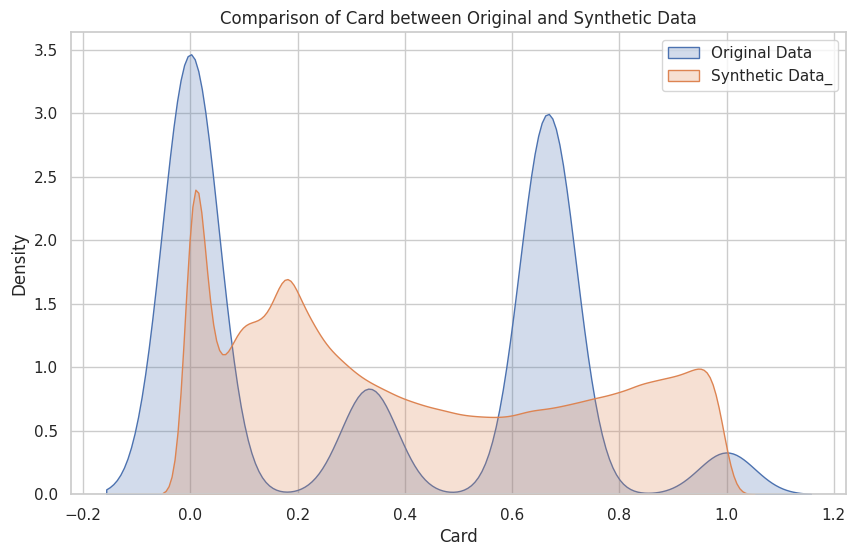

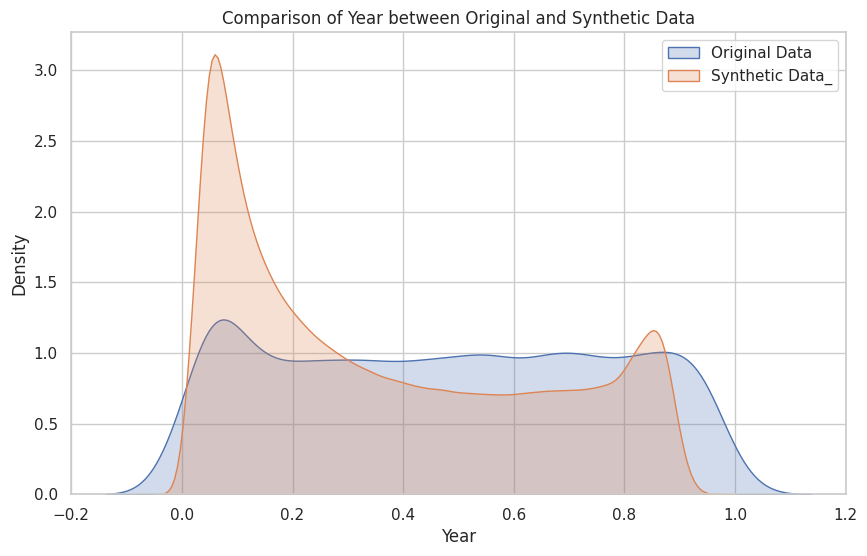

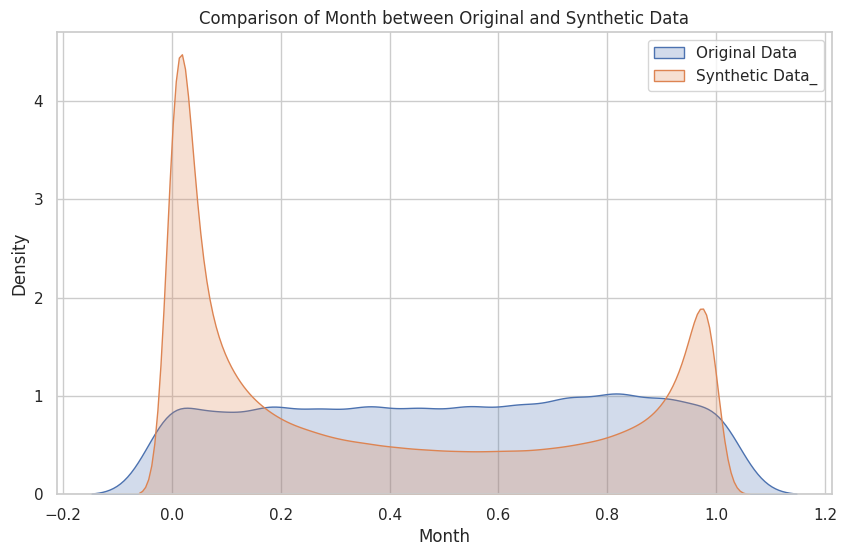

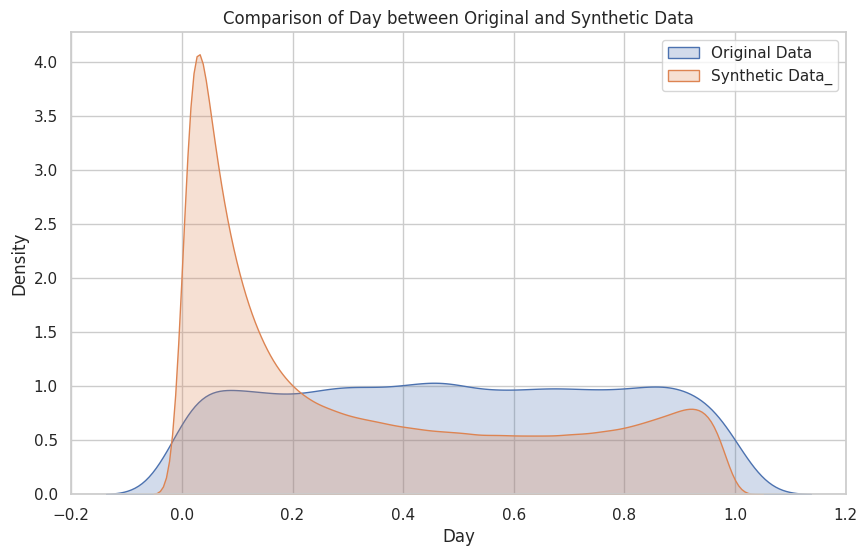

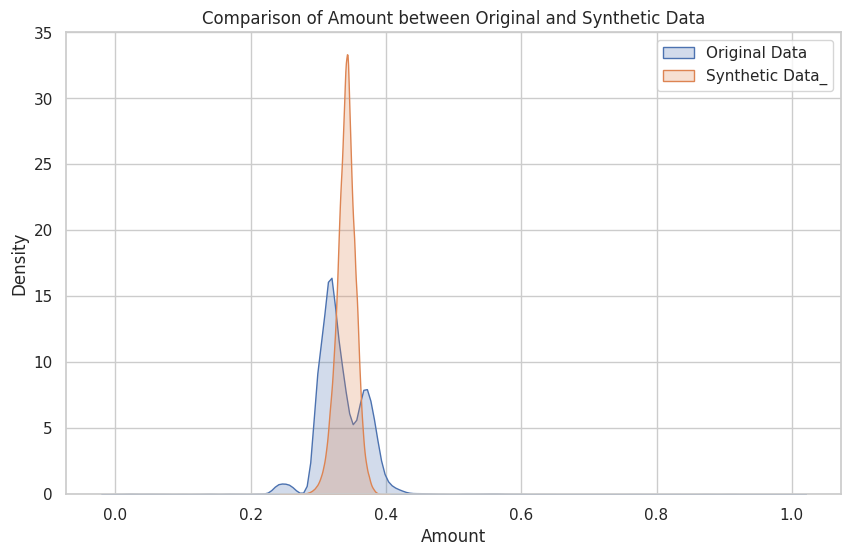

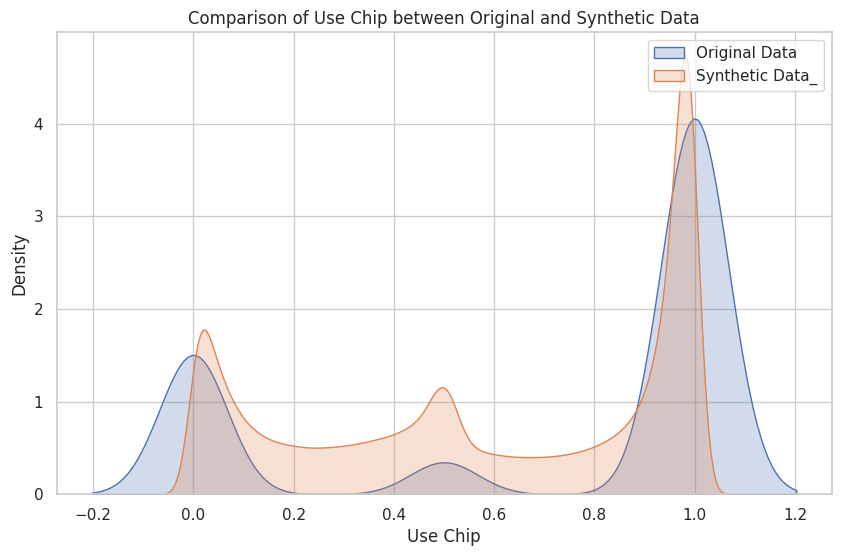

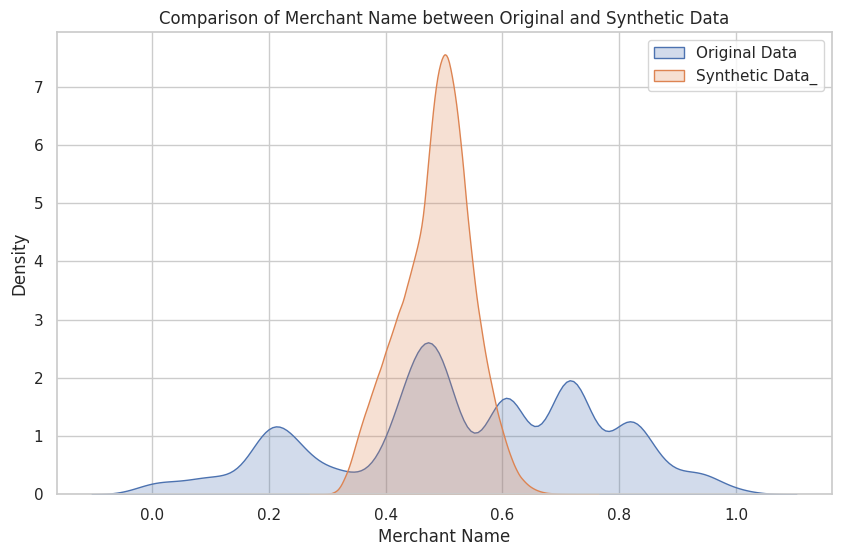

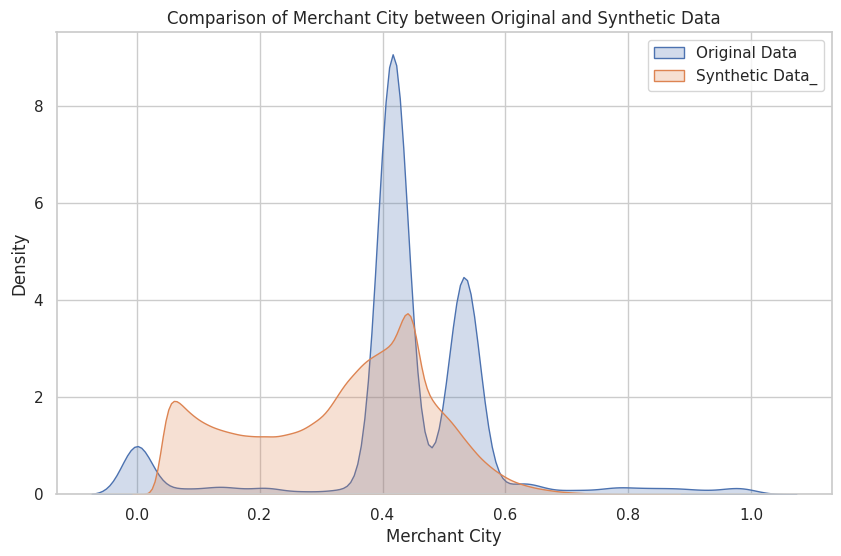

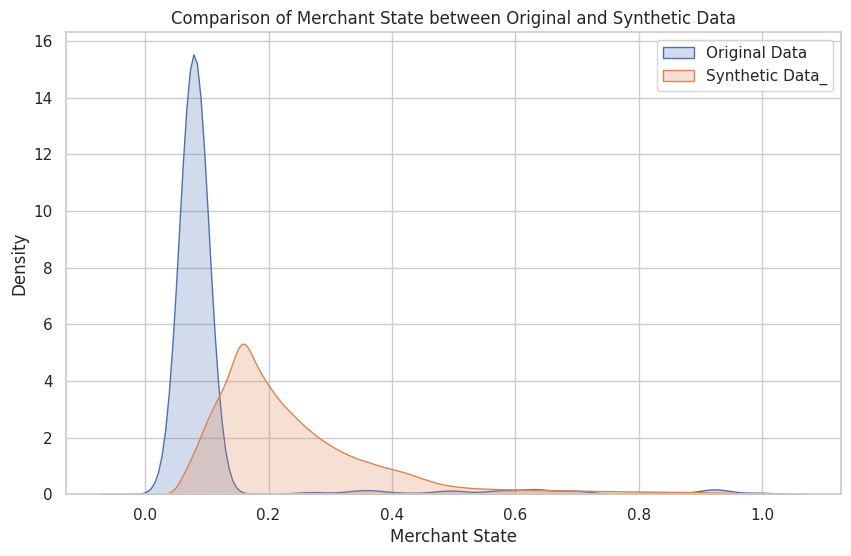

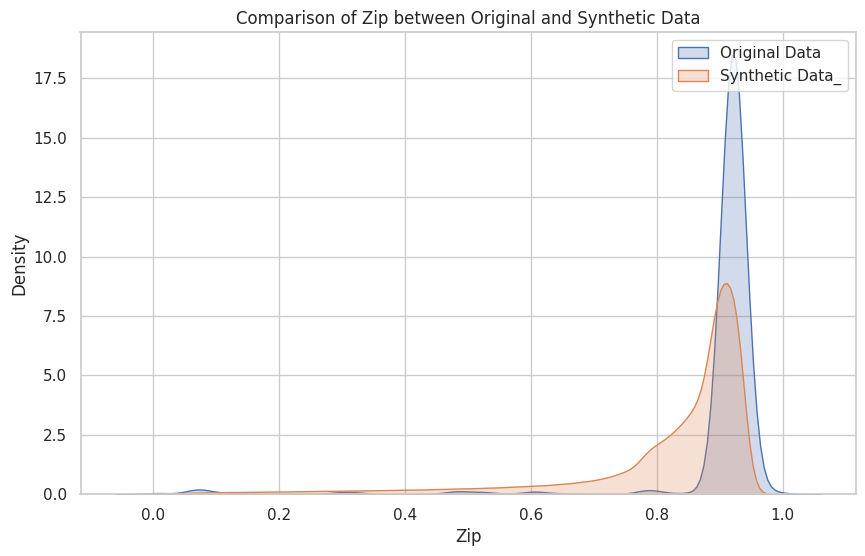

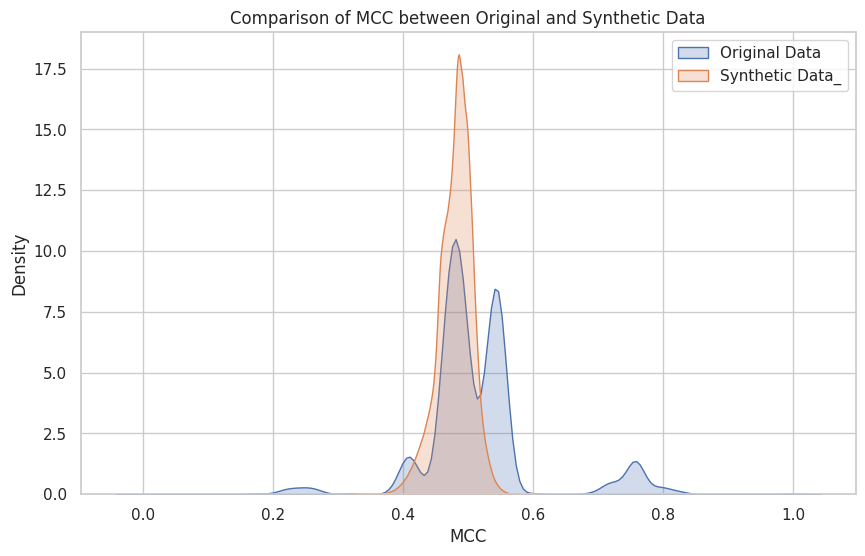

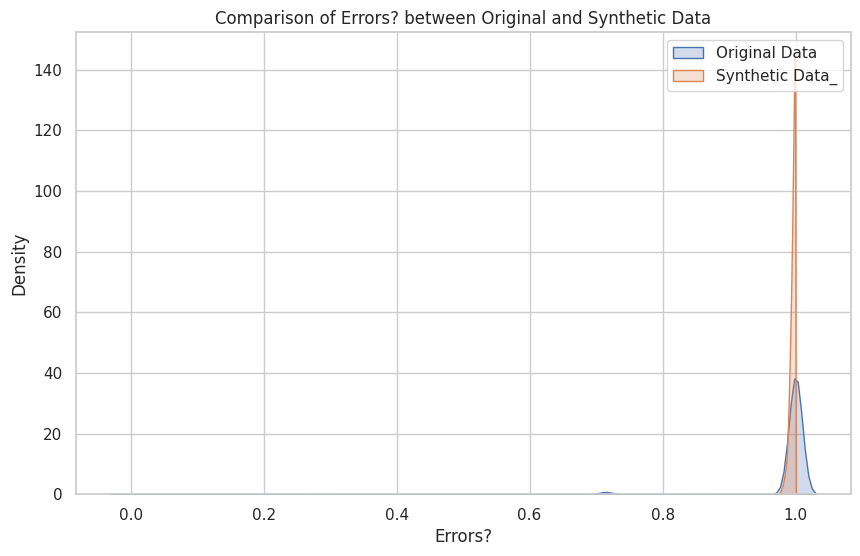

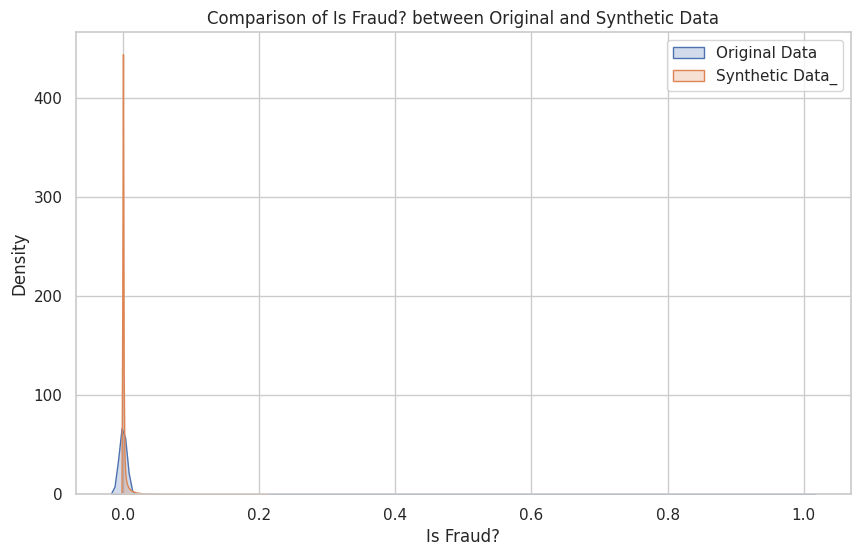

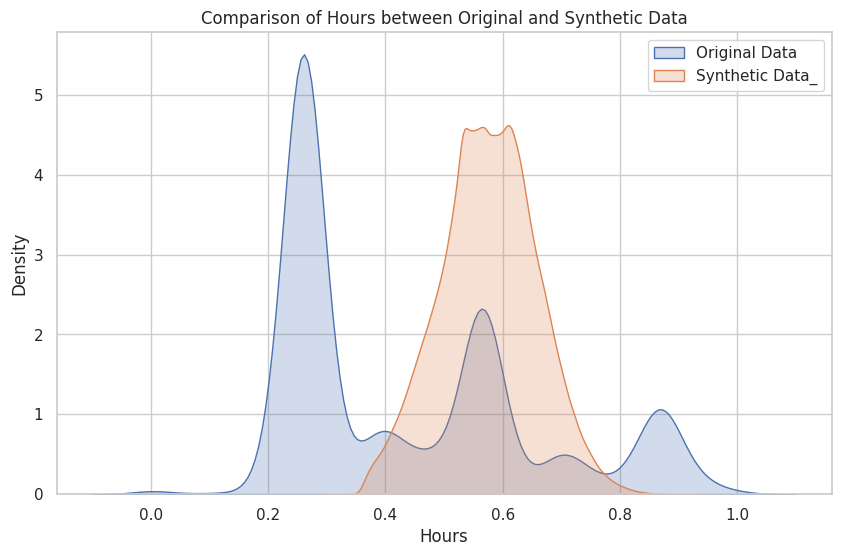

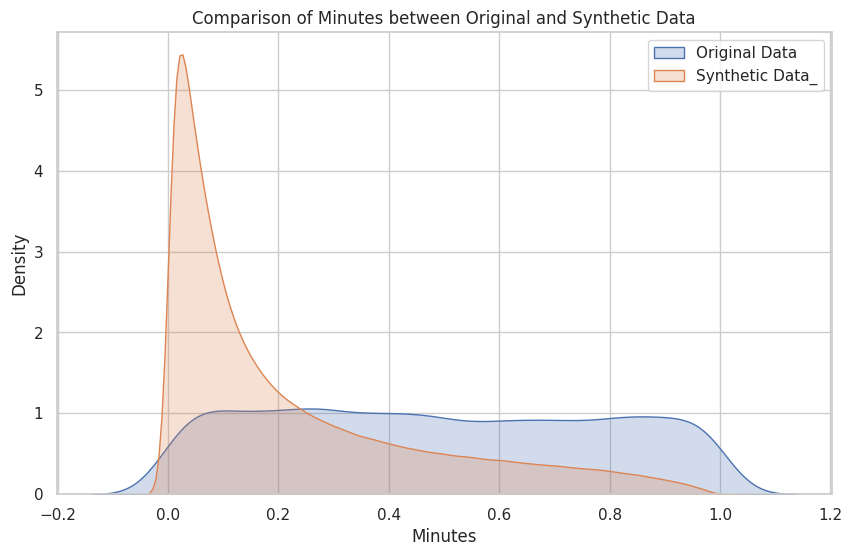

In [68]:
# Function to plot KDE plots for each column
def plot_kde_comparison(data1, data2, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data1[col], label='Original Data', fill=True)
        sns.kdeplot(data2[col], label='Synthetic Data_', fill=True)
        plt.title(f'Comparison of {col} between Original and Synthetic Data')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend()
        plt.show()

# List of columns to compare
columns_to_compare =  ['Card', 'Year', 'Month', 'Day', 'Amount', 'Use Chip',
                      'Merchant Name', 'Merchant City', 'Merchant State', 'Zip',
                      'MCC', 'Errors?', 'Is Fraud?', 'Hours', 'Minutes']

# Generate KDE plots for each column
plot_kde_comparison(data_scaled, synthetic_data, columns_to_compare)

## **plot graph for both data_scaled and Synthetic Data**

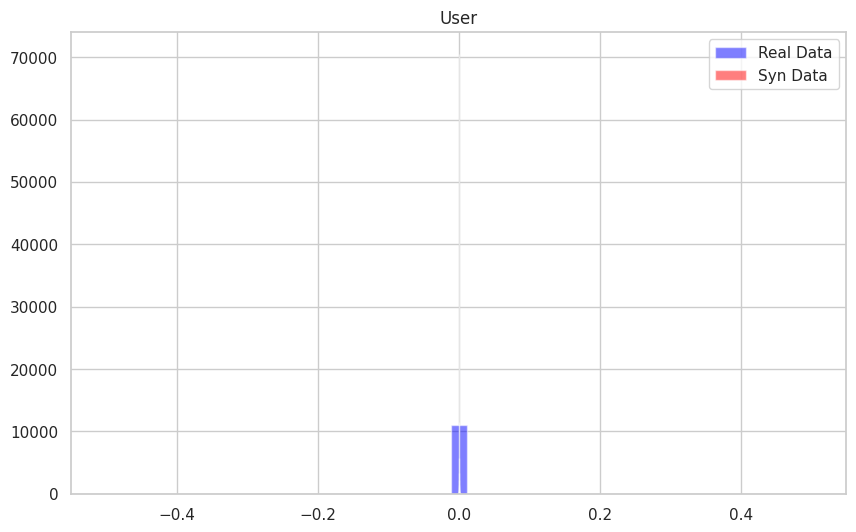

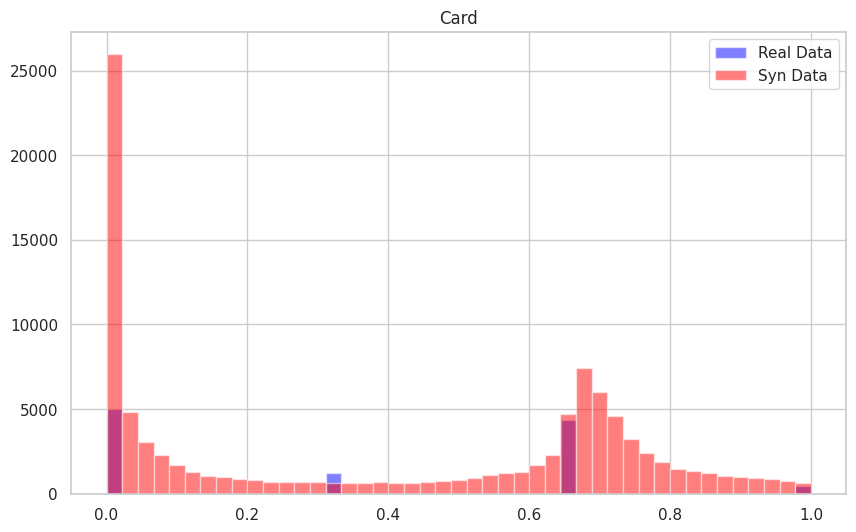

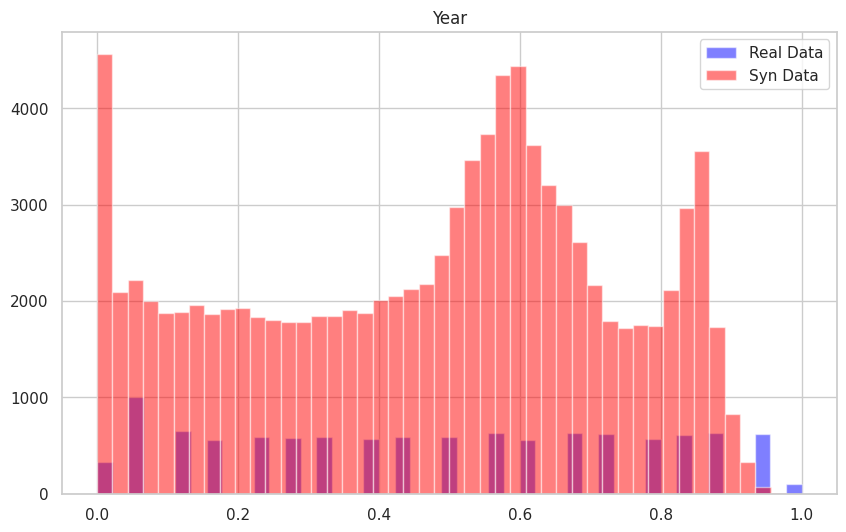

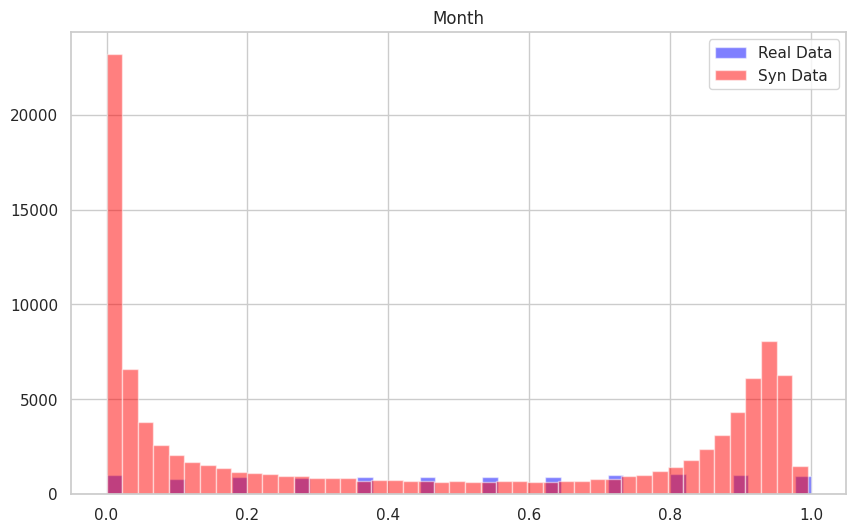

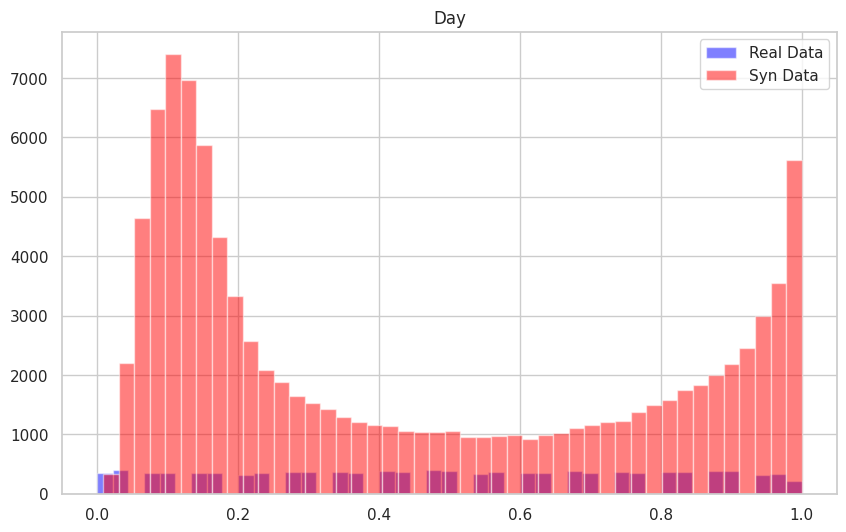

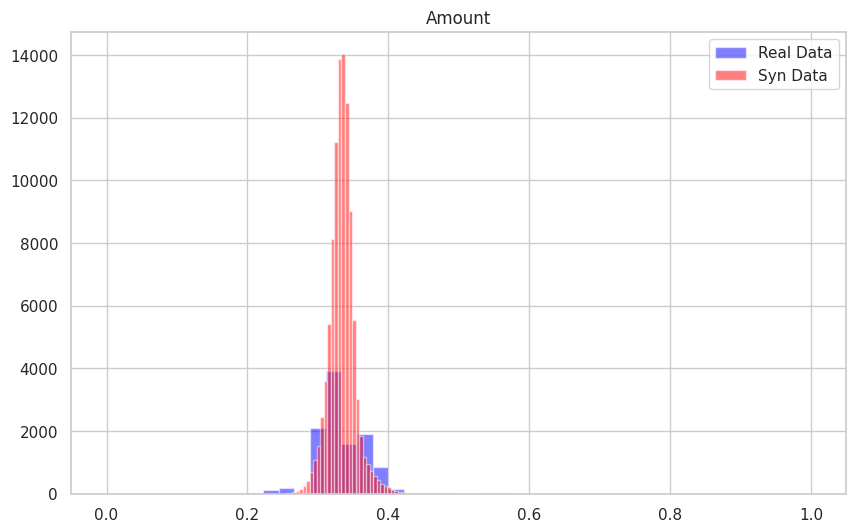

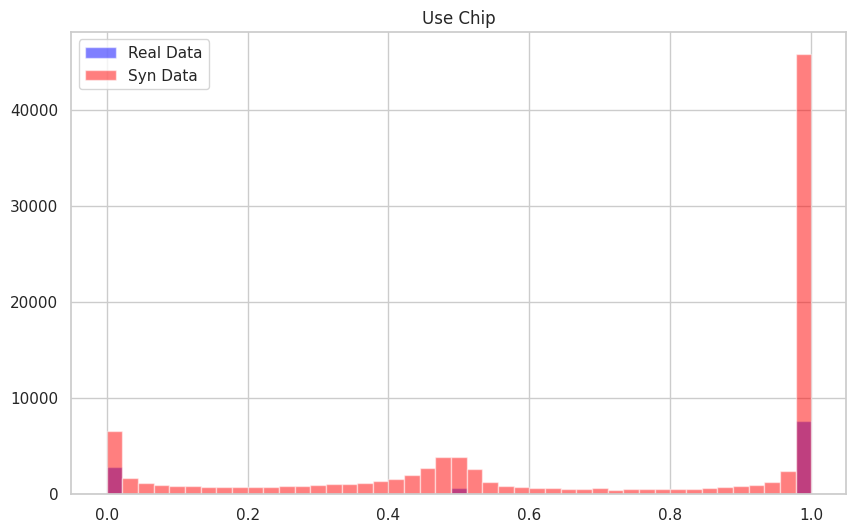

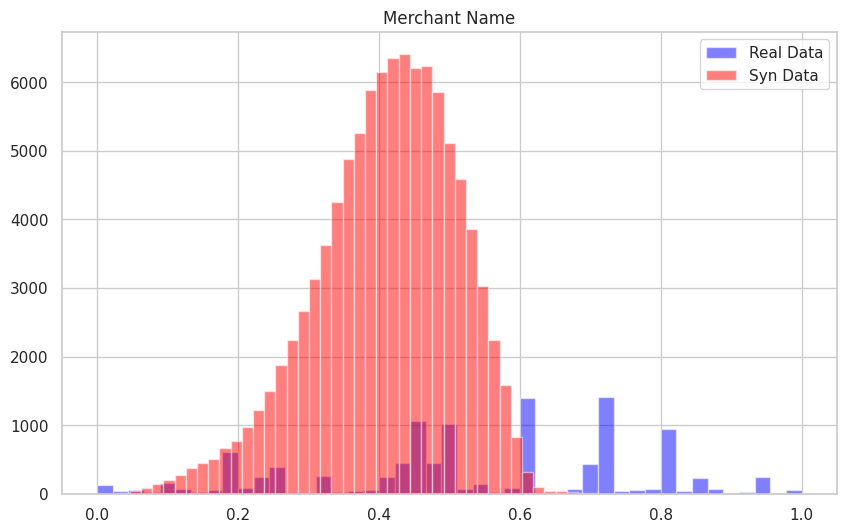

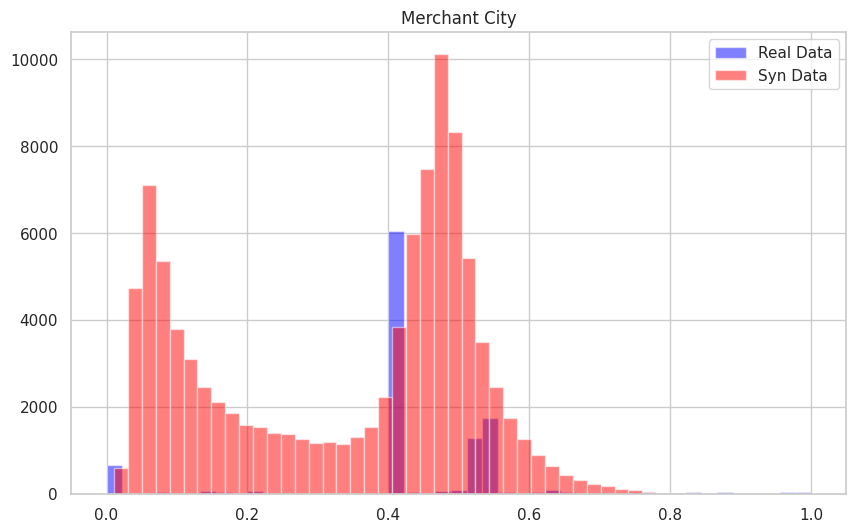

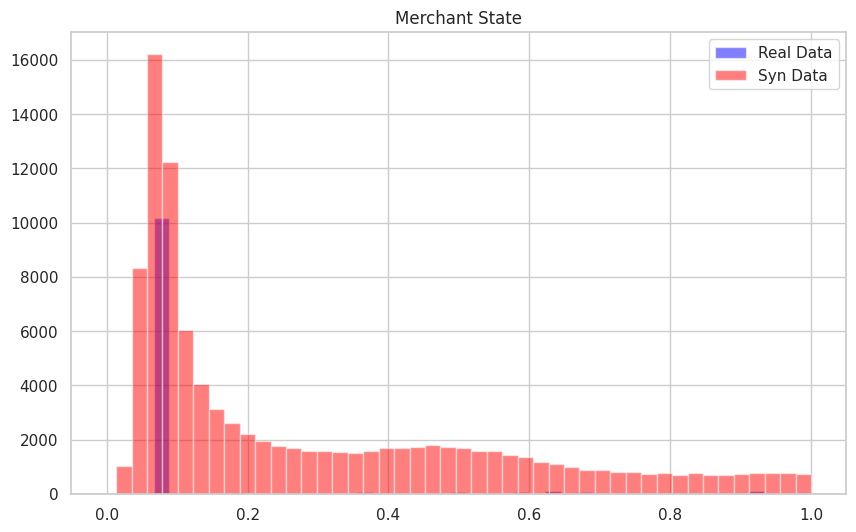

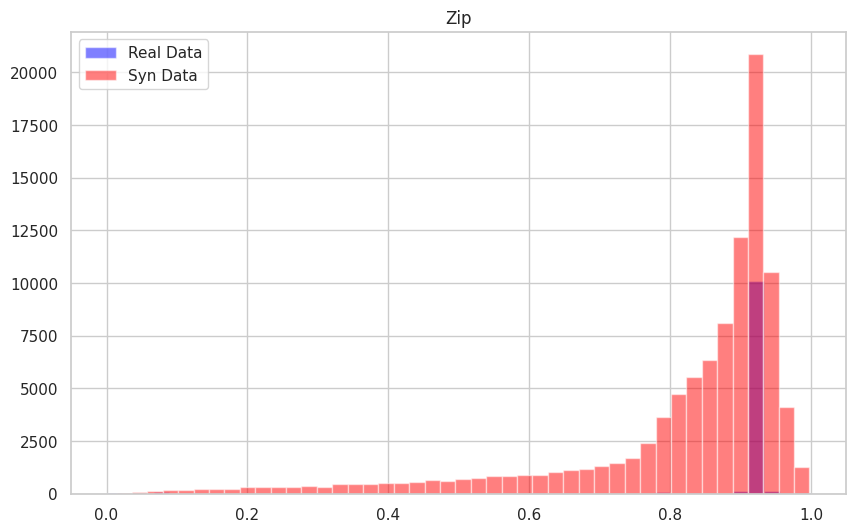

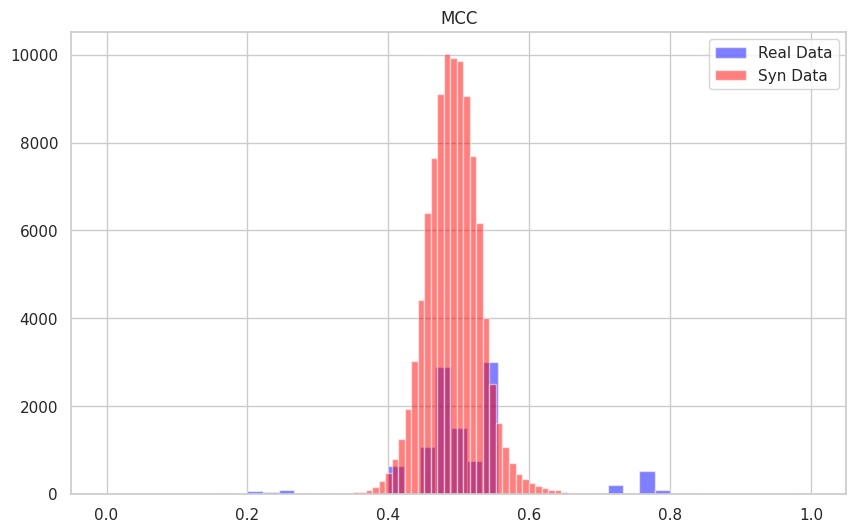

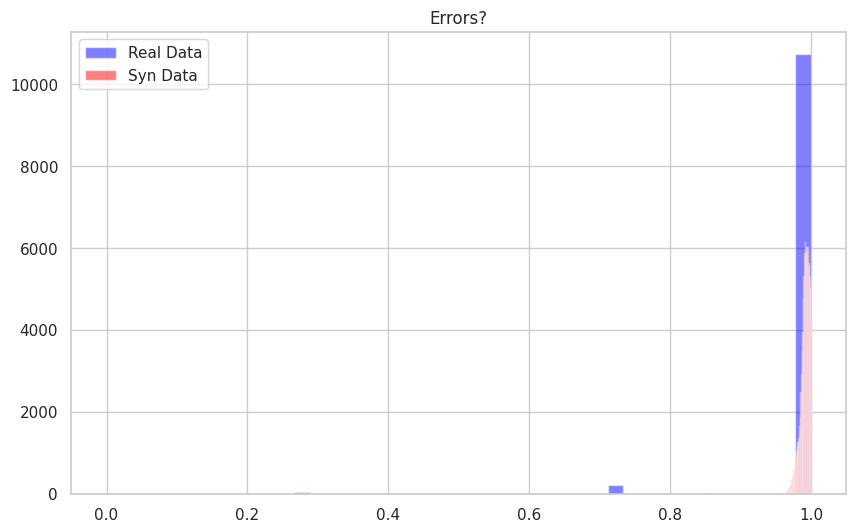

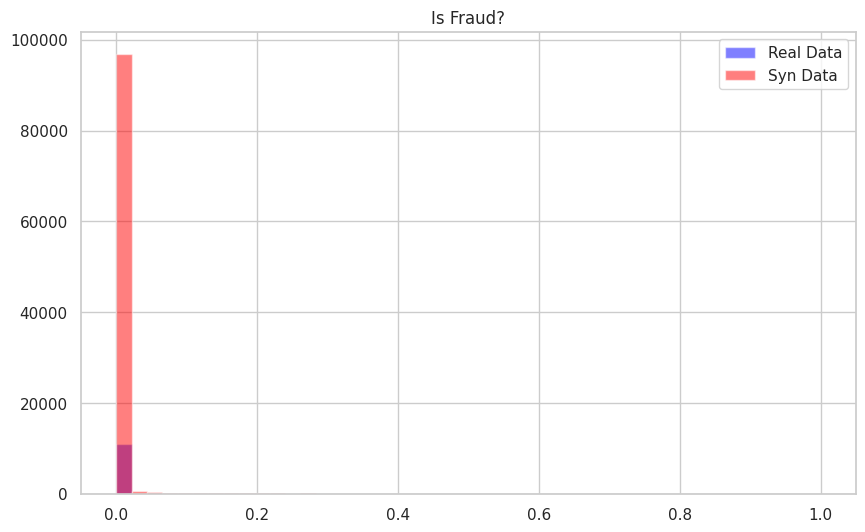

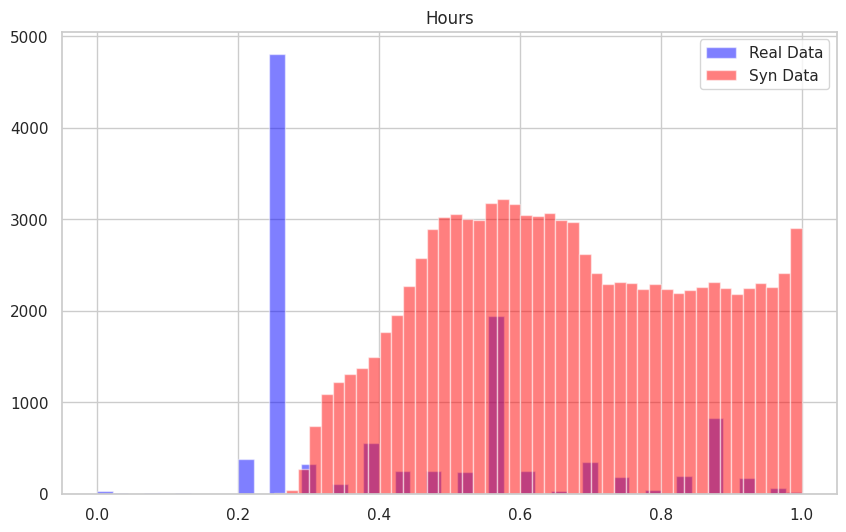

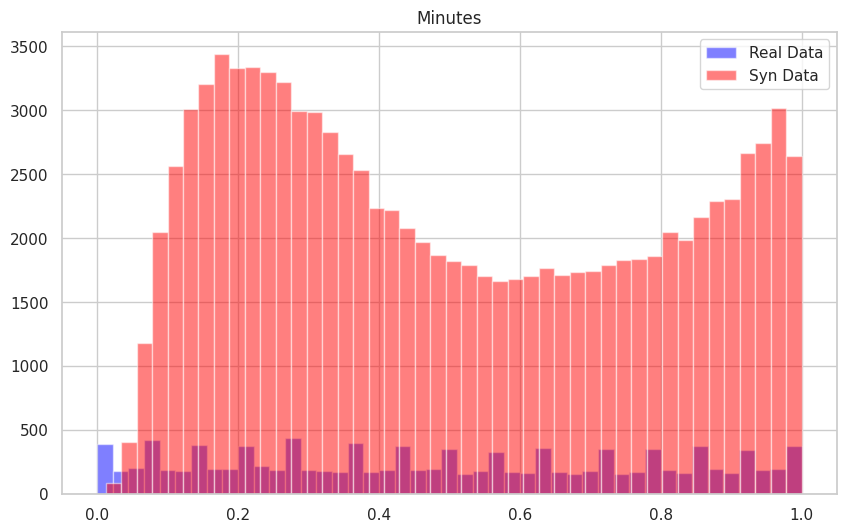

In [66]:

#plot graph for top 10 coloumn
for i in range(synthetic_data_1.shape[1]):
    plt.figure(figsize=(10, 6))
    plt.hist(data_scaled.iloc[:,i],bins=45,alpha=0.5,color="blue",label='Real Data')
    plt.hist(synthetic_data_1.iloc[:,i],bins=45,alpha=0.5,color="Red",label='Syn Data')
    plt.title(data_scaled.columns[i])
    plt.legend()
    plt.show()

In [57]:
# #plot graph for top 10 coloumn
# for i in range(synthetic_data.shape[1]):
#     plt.figure(figsize=(10, 6))
#     plt.hist(data_scaled.iloc[:,i],bins=45,alpha=0.5,color="blue",label='Real Data')
#     plt.hist(synthetic_data.iloc[:,i],bins=45,alpha=0.5,color="Red",label='Syn Data')
#     plt.title(data_scaled.columns[i])
#     plt.legend()
#     plt.show()

# **Calculating the Metrics::**

In [44]:
# What % of data is a direct copy of the real data?
# Total data = concat(real, synth)
# dup_total = len(total) - len(total.drop_duplicates())

# Concatenate real and synthetic data
total_data = pd.concat([data_scaled, synthetic_data])

# Count the total number of rows
total_rows = len(total_data)

# Count the number of duplicated rows
dup_total = total_rows - len(total_data.drop_duplicates())

# Calculate the percentage
percent_copied = (dup_total / total_rows) * 100



In [45]:
# What % of data is a direct copy of the real data?
# Total data = concat(real, synth)
# dup_total = len(total) - len(total.drop_duplicates())
# dup_real = (len(real_df) - len(real_df.drop_duplicates()))
# dup_synthetic = len(synth_df) - len(synth_df.drop_duplicates()))

# Count the number of duplicated rows in real data
dup_real = len(data_scaled) - len(data_scaled.drop_duplicates())
print("dup_total or Duplicate Total: ",dup_total,"\n")

# Calculate the percentage
percent_copied = (dup_real / total_rows) * 100



dup_total or Duplicate Total:  0 



In [46]:
# What % of data is a direct copy of the real data?
# Total data = concat(real, synth)
# dup_total = len(total) - len(total.drop_duplicates())
# dup_real = (len(real_df) - len(real_df.drop_duplicates()))
# dup_synthetic = len(synth_df) - len(synth_df.drop_duplicates()))
# Copies = dup_total - dup_real - dup_synthetic
# Zero copies when dup_total = dup_real


# Count the number of duplicated rows in the synthetic data
dup_synthetic = len(synthetic_data) - len(synthetic_data.drop_duplicates())

# What % of data is a self copy (duplicate rows)?
# ((len_syn - len_syn_dropped) / len_syn) * 100

# Count the total number of rows in the synthetic data
len_syn = len(synthetic_data)
#print("total number of rows in the synthetic data:",len_syn)

# Calculate the percentage of self-copied data
percent_self_copied_data = ((len_syn - dup_synthetic) / len_syn) * 100


# Calculate the number of copies
copies = dup_total - dup_real - dup_synthetic

# Calculate the percentage of copied data
if dup_total == dup_real:
    percent_copied = 0
else:
    percent_copied = (copies / total_rows) * 100





**Final Calculations are printed in the below Cell**



In [63]:
print("total number of rows in the synthetic data:",len_syn)
print("number of duplicated rows in the synthetic data(dup_synthetic):",dup_synthetic)
print("Total number of rows in concatenated data: ",total_rows)


print("----------------------------------------------------")
print("dup_total or Duplicate Total: ",dup_total,"\n")
print("Percentage of data that is direct copy of real data: ",percent_copied,"%\n")
print("----------------------------------------------------")
print("Percentage of self-copied data:", percent_self__copied_data,"%\n")



total number of rows in the synthetic data: 2000000
number of duplicated rows in the synthetic data(dup_synthetic): 0
Total number of rows in concatenated data:  2011022
----------------------------------------------------
dup_total or Duplicate Total:  0 

Percentage of data that is direct copy of real data:  0 %

----------------------------------------------------
Percentage of self-copied data: 22 %



In [62]:
synthetic_data_copy = pd.DataFrame(synthetic_data)

In [49]:
#inverse of minmax
synthetic_data_copy_minmax_inverse = scaler.inverse_transform(synthetic_data_copy)
# Convert the scaled array back to a DataFrame
synthetic_data_copy_minmax_inverse_1 = pd.DataFrame(synthetic_data_copy_minmax_inverse, columns=data_scaled.columns)
synthetic_data_copy_minmax_inverse_1.head()

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Hours,Minutes
0,0.000018,0.858239,2017.463135,3.051409,1.189650,22.726376,0.002741,1.602990e+18,123.479034,8.626174,85864.273438,5604.601562,6.978600,1.039875e-05,10.758140,7.665623
1,0.000001,2.936695,2002.464966,11.660402,5.069313,89.122475,1.179959,3.768720e+17,136.141464,26.418201,25902.404297,5542.568848,6.997666,3.151864e-07,16.698923,0.038482
2,0.000010,1.224162,2012.584961,1.136716,1.079604,43.596451,0.855286,2.172446e+18,147.351746,12.967968,90004.304688,5353.150391,6.993886,3.225631e-06,13.039145,9.934073
3,0.000158,0.083493,2003.153320,6.561781,26.368830,78.370987,1.759530,-1.211620e+18,60.514084,5.228037,90254.914062,5620.951172,6.940497,1.397573e-03,11.487370,23.485048
4,0.000123,0.432424,2012.473389,11.925706,1.795992,107.752022,0.186742,-1.710350e+18,71.763809,18.559582,47152.074219,5422.554688,6.966349,6.482343e-03,15.099157,8.197491


In [50]:

 # Convert categorical columns back to their original labels
 # Assign synthetic data to a new DataFrame
synthetic_data_df = pd.DataFrame(synthetic_data_copy_minmax_inverse_1)

# Optionally, you can specify column names for the new DataFrame
synthetic_data_df.columns = data.columns

# Display the first few rows of the new DataFrame
print(synthetic_data_df.head())
for column, encoder in encoder_dict.items():
  synthetic_data_df[column] = encoder.inverse_transform(synthetic_data[column].round().astype(int))

       User      Card         Year      Month        Day      Amount  \
0  0.000018  0.858239  2017.463135   3.051409   1.189650   22.726376   
1  0.000001  2.936695  2002.464966  11.660402   5.069313   89.122475   
2  0.000010  1.224162  2012.584961   1.136716   1.079604   43.596451   
3  0.000158  0.083493  2003.153320   6.561781  26.368830   78.370987   
4  0.000123  0.432424  2012.473389  11.925706   1.795992  107.752022   

   Use Chip  Merchant Name  Merchant City  Merchant State           Zip  \
0  0.002741   1.602990e+18     123.479034        8.626174  85864.273438   
1  1.179959   3.768720e+17     136.141464       26.418201  25902.404297   
2  0.855286   2.172446e+18     147.351746       12.967968  90004.304688   
3  1.759530  -1.211620e+18      60.514084        5.228037  90254.914062   
4  0.186742  -1.710350e+18      71.763809       18.559582  47152.074219   

           MCC   Errors?     Is Fraud?      Hours    Minutes  
0  5604.601562  6.978600  1.039875e-05  10.758140   7

In [51]:
synthetic_data_df.drop("Merchant City",axis=1, inplace=True)

In [52]:
synthetic_data_df.head()

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant State,Zip,MCC,Errors?,Is Fraud?,Hours,Minutes
0,0.000018,0.858239,2017.463135,3.051409,1.189650,22.726376,Chip Transaction,1.602990e+18,AK,85864.273438,5604.601562,"Bad Expiration,",No,10.758140,7.665623
1,0.000001,2.936695,2002.464966,11.660402,5.069313,89.122475,Online Transaction,3.768720e+17,AR,25902.404297,5542.568848,"Bad Expiration,",No,16.698923,0.038482
2,0.000010,1.224162,2012.584961,1.136716,1.079604,43.596451,Chip Transaction,2.172446e+18,AK,90004.304688,5353.150391,"Bad Expiration,",No,13.039145,9.934073
3,0.000158,0.083493,2003.153320,6.561781,26.368830,78.370987,Online Transaction,-1.211620e+18,AK,90254.914062,5620.951172,"Bad Expiration,",No,11.487370,23.485048
4,0.000123,0.432424,2012.473389,11.925706,1.795992,107.752022,Chip Transaction,-1.710350e+18,AK,47152.074219,5422.554688,"Bad Expiration,",No,15.099157,8.197491


In [53]:
columns_to_convert=["Year","Month","Day","Zip","MCC","Hours", "Minutes"]
synthetic_data_df[columns_to_convert] = synthetic_data_df[columns_to_convert].astype(int)

# **Final Synthetic Data**

In [69]:
synthetic_data_df.head()

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant State,Zip,MCC,Errors?,Is Fraud?,Hours,Minutes
0,0.000018,0.858239,2017,3,1,22.726376,Chip Transaction,1.602990e+18,AK,85864,5604,"Bad Expiration,",No,10,7
1,0.000001,2.936695,2002,11,5,89.122475,Online Transaction,3.768720e+17,AR,25902,5542,"Bad Expiration,",No,16,0
2,0.000010,1.224162,2012,1,1,43.596451,Chip Transaction,2.172446e+18,AK,90004,5353,"Bad Expiration,",No,13,9
3,0.000158,0.083493,2003,6,26,78.370987,Online Transaction,-1.211620e+18,AK,90254,5620,"Bad Expiration,",No,11,23
4,0.000123,0.432424,2012,11,1,107.752022,Chip Transaction,-1.710350e+18,AK,47152,5422,"Bad Expiration,",No,15,8


# **Summary**

# **Dataset**

Dataset consists of 15 coloumns and "11022" rows. Data represents card transactional data. There are many values with "Nan" which are handled in the preprocessing

# **Purpose**
The purpose of this notebook is to generate synthetic data using a Variational Autoencoder (VAE).

# **Pre-processing:**
First we handled all the NaN(Not a number) values in various coloumns of the data. Filled those Nan Values with the most frequent values but making sure they are appropriate.

Then we converted the Time into hours and minutes so that they can be given to model.

# **Standardization**

We applied Label Encoder on text coloums(Text coloumns=
['Use Chip', 'Merchant City', 'Merchant State', 'Errors?','Is Fraud?'])

then applied MinMax scaler on whole data so that we can pass the data into vae model

# **VAE Model**

**Encoder:** The encoder network reduces the input data to a lower-dimensional space.

Input layer with the shape of the data

Dense layer with 256 units and ReLU activation

Dropout layer with a dropout rate of 0.2

Dense layer with 64 units and ReLU activation

Two Dense layers to output the mean (z_mean) and log variance (z_log_var) of the latent space representation.

**Decoder:** The decoder network reconstructs the original data from the latent space.

Input layer with shape (latent_dim,)

Dense layer with 64 units and ReLU activation

Dense layer with 256 units and ReLU activation

Dense layer with the shape of the input data and sigmoid activation to produce the final reconstruction.


# **Loss function**

Reconstruction Loss (MSE): Measures the average squared difference between reconstructed output and original input. Encourages accurate data reconstruction.

KL Divergence: Compares the inferred latent distribution to a standard normal distribution. Encourages a well-structured latent space resembling the standard distribution.

# **Optimizer:**
Adam optimizer is used for training the VAE.


# **VAE summary**


Layer (type)                Output Shape              Param #   

=================================================================

 encoder (Functional)        [(None, 4),               21320     
                              (None, 4)]                         
                                                                 
 decoder (Functional)        (None, 16)                21072     
                                                                 

=================================================================

Total params: 42392 (165.59 KB)

Trainable params: 42392 (165.59 KB)

Non-trainable params: 0 (0.00 Byte)

_________________________________________________________________


# **Training the Model**


*   Epochs : 80
*   Batch Size: 128

# **Plots**

After training the model we have produced KDE plots and histograms to comare the data

# **Final Results**

**Total number of rows in the synthetic data: 2000000**

**number of duplicated rows in the synthetic data(dup_synthetic): 0**

**Total number of rows in concatenated data: 2011022**

**dup_total or Duplicate Total: 0**

**Percentage of data that is direct copy of real data: 0**

**Percentage of self-copied data: 22 %**